In [1]:
library(RColorBrewer)
coul <- brewer.pal(8, "Set3") 

# Estimación GUM

## Indicaciones con patrones

In [2]:
d=10
L_exc=7290
m_c=c(1000.01,2000.01,4000.02,6000.03,8000.044,10000.074)
U_exp=c(0.11,0.22,0.45,0.66,0.791,1.011)
EMP=c(0.5,1,2,3,3.6,4.6)
Is=c(1000,2990,4990,6990,7990,9990)
Rep=c(25390,25390,25390)
I_exc1=rep(L_exc,3)
I_exc2=rep(L_exc,3)
dif_max=abs(max(I_exc1,I_exc2)-min(I_exc1,I_exc2))
error=Is-m_c

In [3]:
u_empj=m_c*0.42/10**6
u_mc=U_exp/2
u_res=d/sqrt(12)
u_rep=sd(Rep)
u_der=EMP/sqrt(3)/3

In [4]:
u_exc=dif_max*Is/L_exc/sqrt(12)

In [5]:
u_c=sqrt(u_mc**2+u_rep**2+2*u_res**2+u_der**2+u_exc**2+u_empj**2)

In [6]:
U=2*u_c

In [7]:
U

[1] 8.167974 8.176993 8.213511 8.272583 8.319399 8.415680

### Gráficas de pesos de incertidumbre por cada punto de calibración

In [8]:
resumen=array(c(rep(u_res,6),rep(u_res,6),u_der,u_mc,u_empj,rep(u_rep,6),u_exc,u_c),dim=c(6,8))
fuentes=c("Resolución con carga","Resolución sin carga","Deriva de patrones","Patrones","Empuje del aire","Repetibilidad","Excentricidad","Incertidumbre combinada")

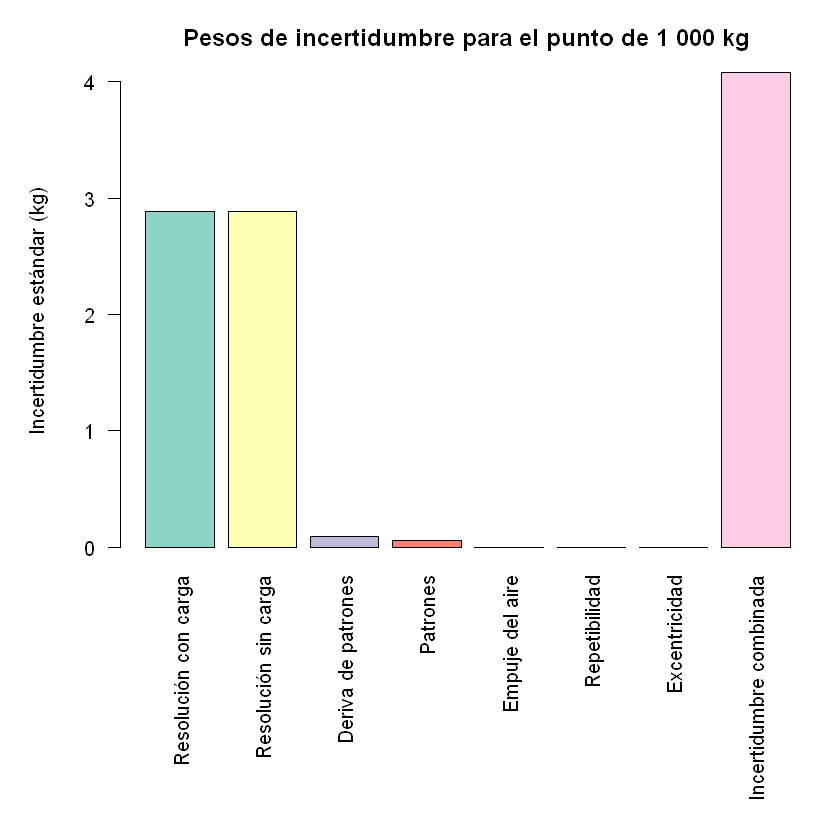

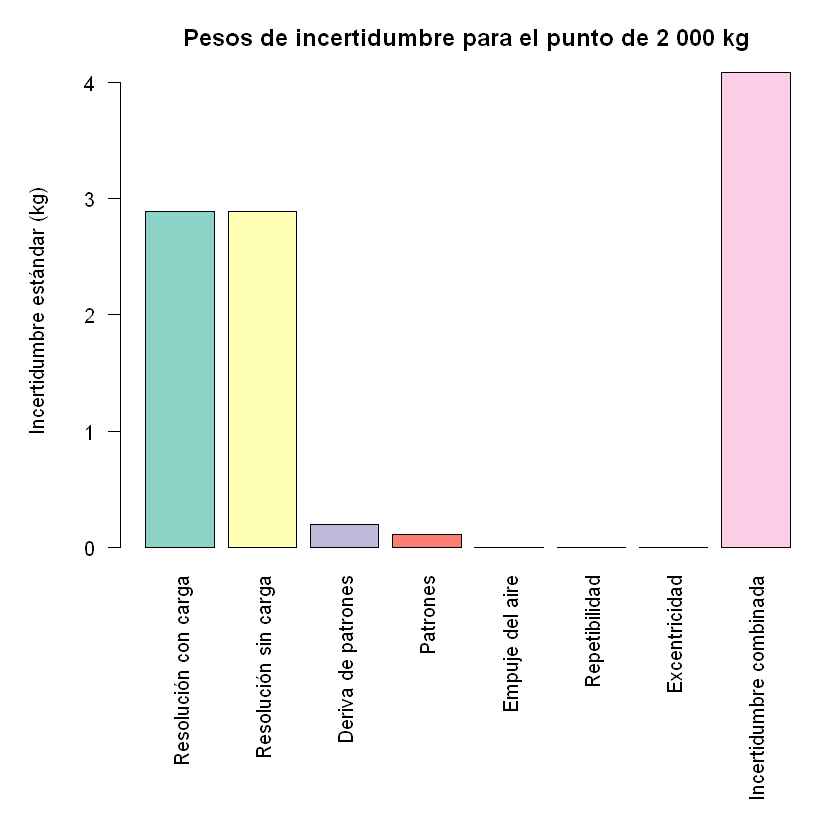

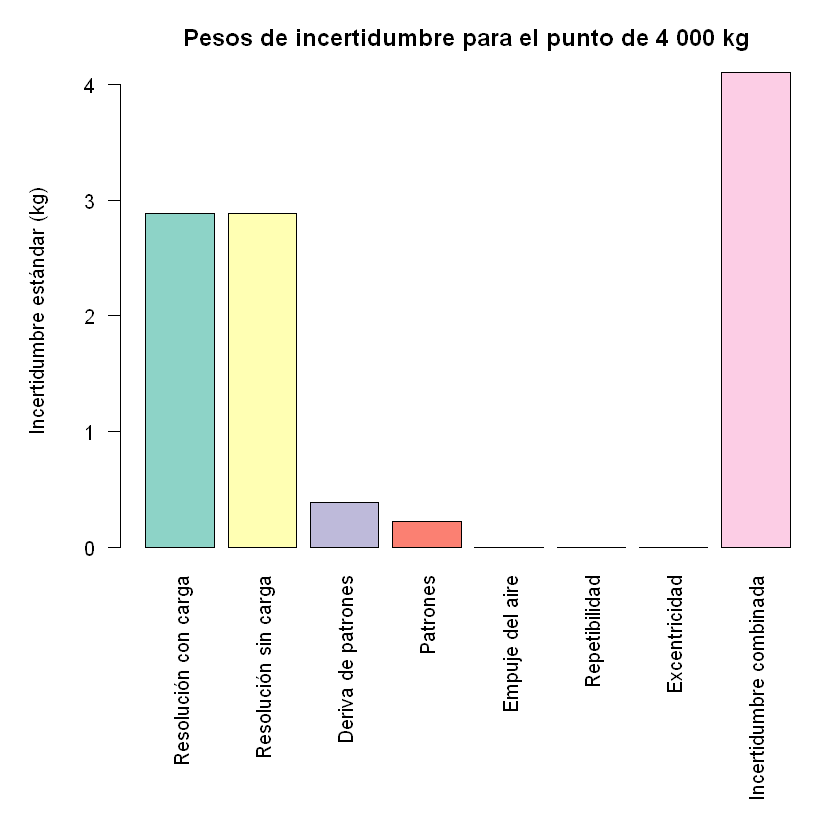

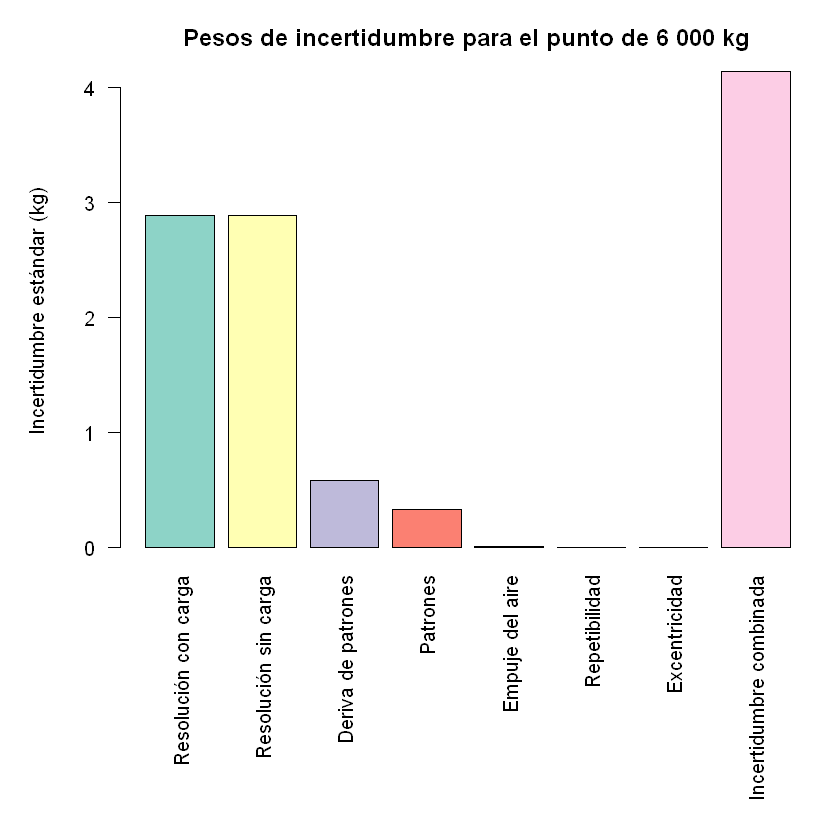

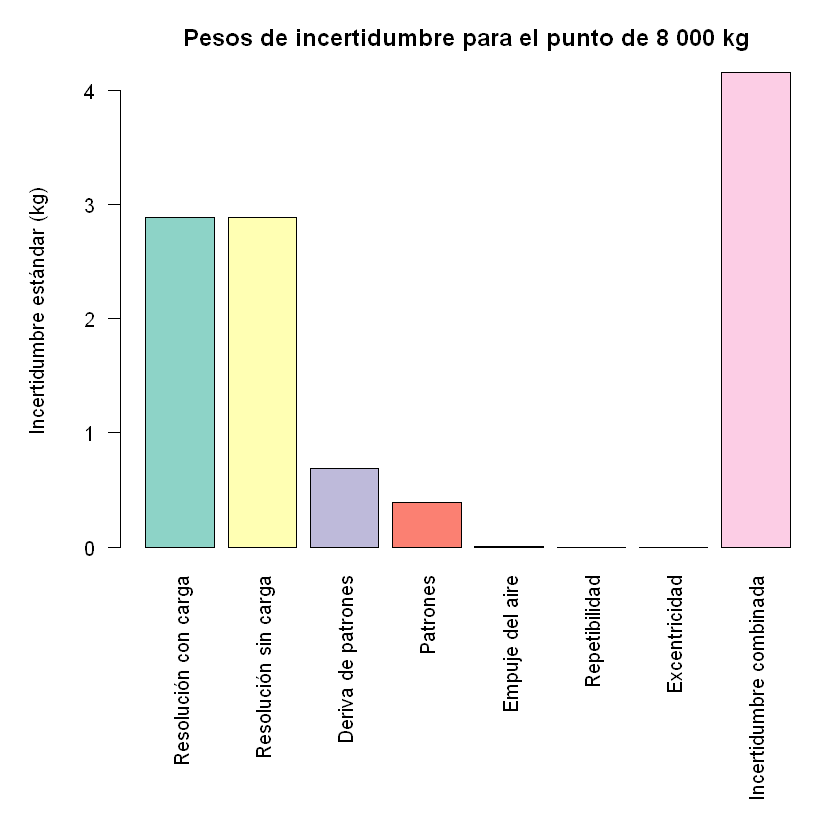

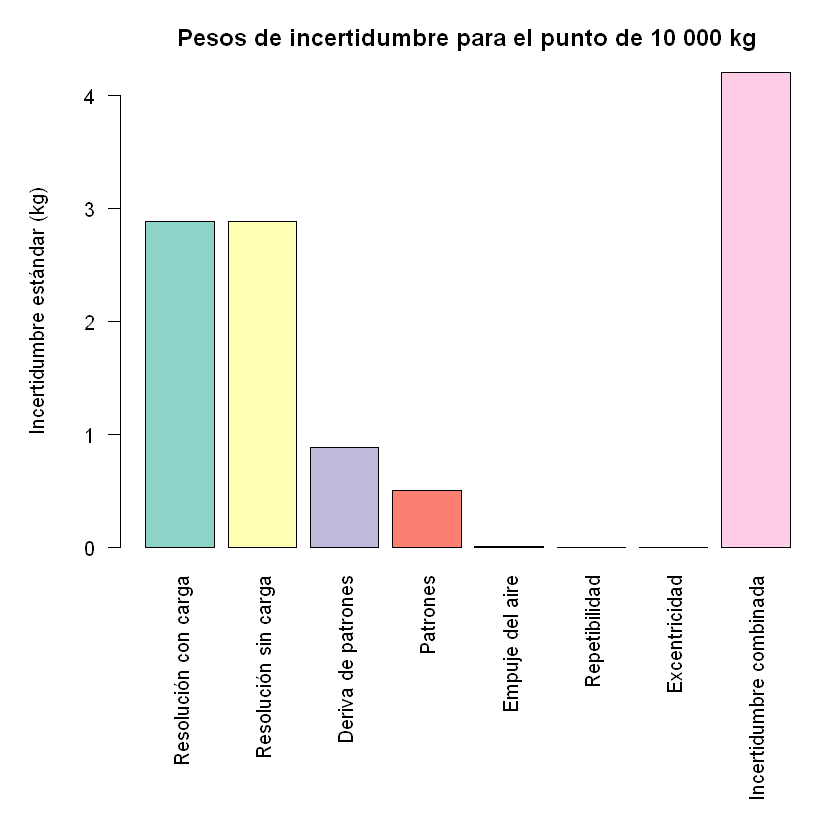

In [9]:
for (i in 1:6){
    par(mar=c(12,5,3,1))
    barplot(resumen[i,],names.arg=fuentes,las=2,col=coul, ylab="Incertidumbre estándar (kg)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])/1000),"000","kg",sep=" "))
    }

## Indicaciones para masas de sustitución

In [10]:
m_c=rep(10000.074,4)*c(2,3,4,5)
U_exp=rep(1.011,4)
EMP=rep(4.6,4)
Is=c(19990,29980,39980,49970)
error=Is-m_c

In [11]:
u_empj=m_c*0.42/10**6
u_exc=dif_max*Is/L_exc/sqrt(12)
u_res=d/sqrt(12)
u_mc=U_exp/2
u_rep=sd(Rep)
u_der=EMP/sqrt(3)/3

In [12]:
n=c(2,3,4,5)

In [13]:
u_Lt=sqrt(n**2*(u_mc**2+u_empj**2+u_der**2)+(2*n-2)*(u_exc**2+u_rep**2+u_res**2+u_res**2))

In [14]:
u_Lt

[1]  6.122953  8.719014 10.799642 12.622409

In [15]:
U_Lt=2*u_Lt

In [16]:
U_Lt

[1] 12.24591 17.43803 21.59928 25.24482

### Gráficas de pesos de incertidumbres por cada punto de calibración

In [17]:
resumen=array(c(sqrt(2*n-2)*u_res,sqrt(2*n-2)*u_res,n*u_der,n*u_mc,n*u_empj,sqrt(2*n-2)*u_rep,sqrt(2*n-2)*u_exc,u_Lt),dim=c(4,8))
fuentes=c("Resolución con carga","Resolución sin carga","Deriva de patrones","Patrones","Empuje del aire","Repetibilidad","Excentricidad","Incertidumbre combinada")

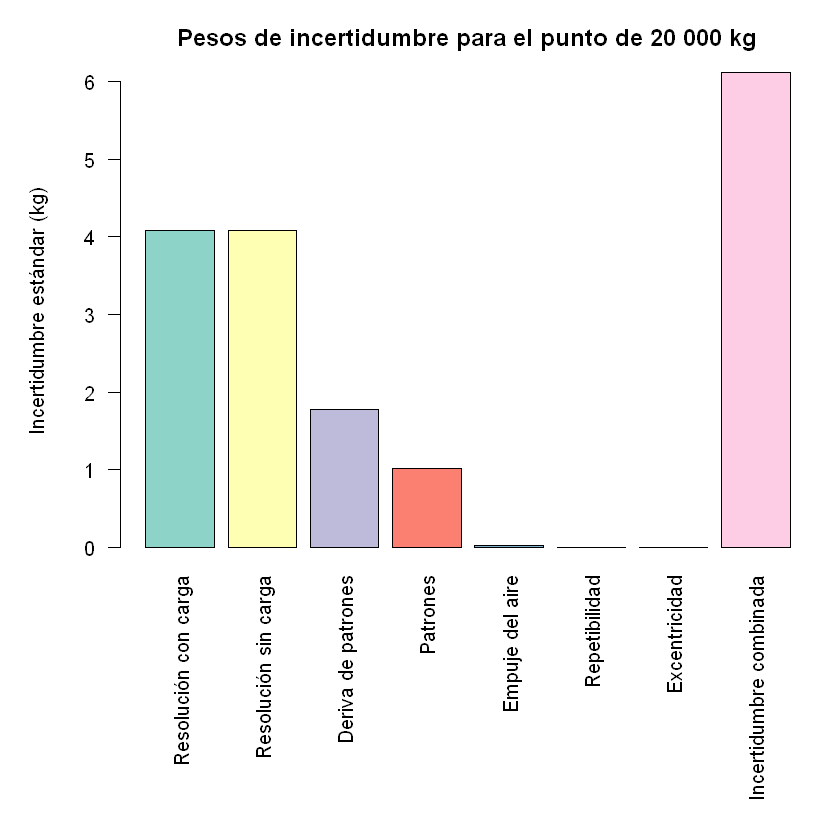

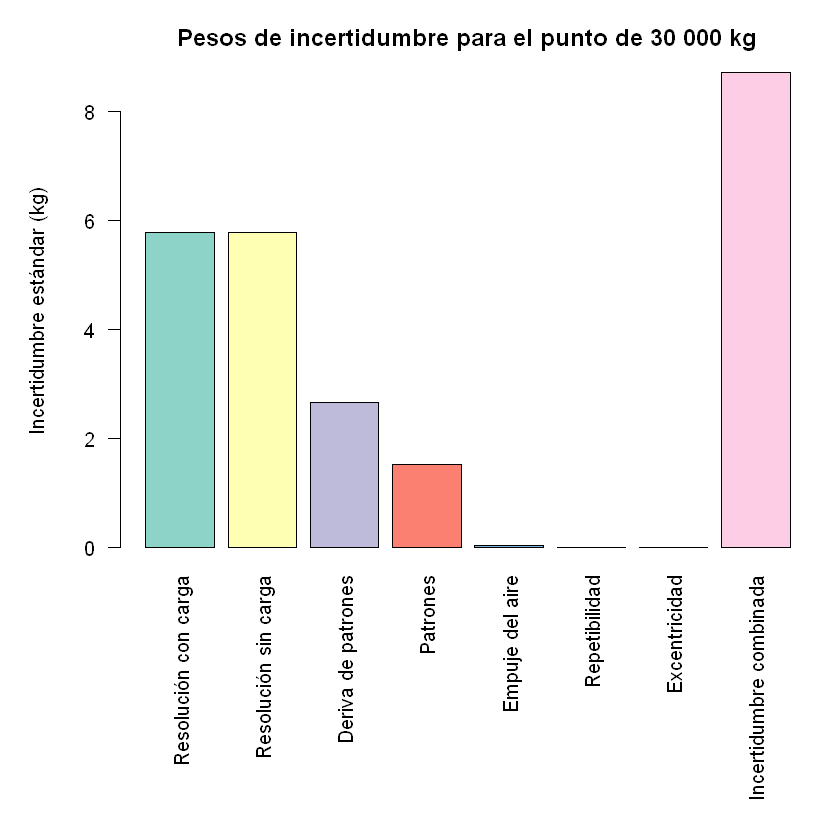

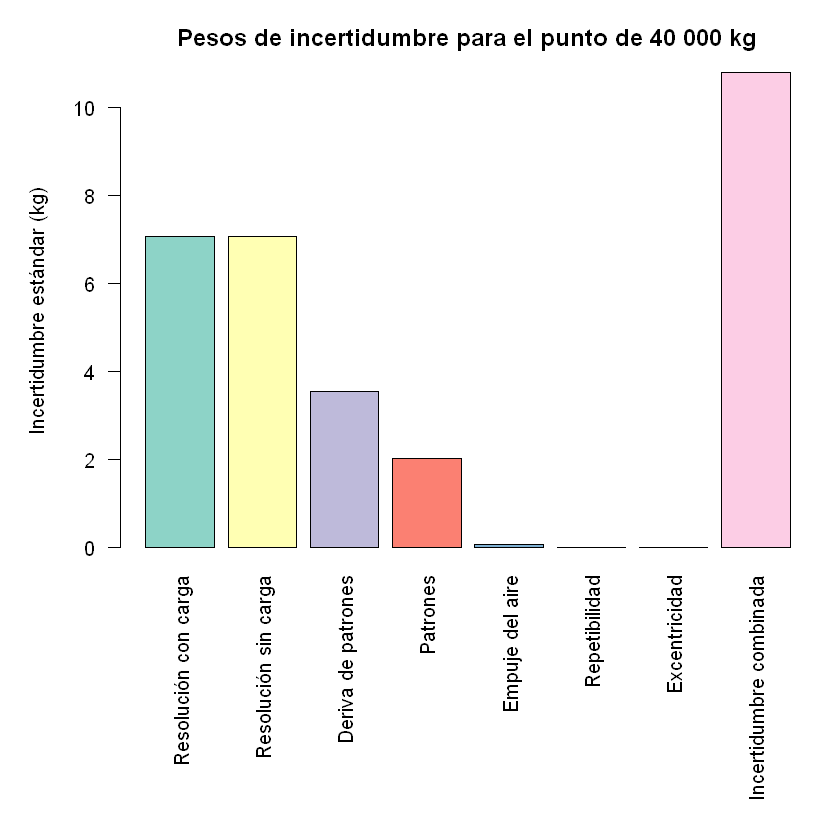

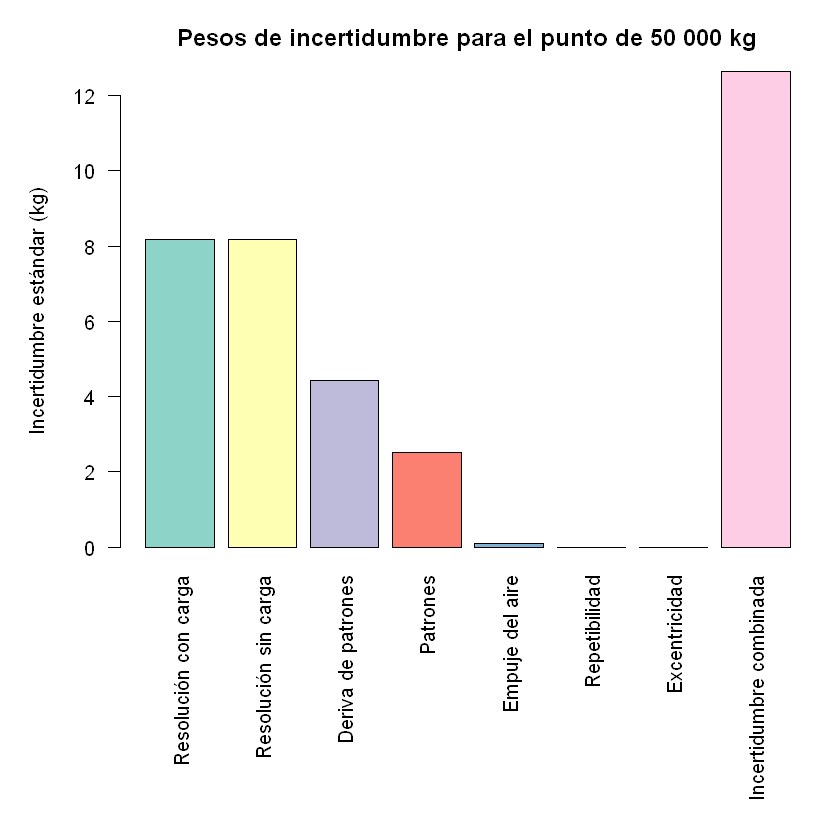

In [18]:
for (i in 1:4){
    par(mar=c(12,5,3,1))
    barplot(resumen[i,],names.arg=fuentes,las=2,col=coul, ylab="Incertidumbre estándar (kg)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])/1000),"000","kg",sep=" "))
    }

# Con Monte Carlo

Se utiliza el método de Monte Carlo para la estimación de la incertidumbre siguiendo el suplemento 101 de la GUM. Se utiliza un muestreo de un millón de números pseudoaleatorios con las funciones ```rnorm``` y ```runif```.

## Indicaciones con patrones

In [19]:
N=10**6
d=10 # kg
L_exc=7280 # kg
m_c=array(c(1000.01,2000.01,4000.02,6000.03,8000.044,10000.074),dim=c(6,1))
Is=c(1000,1990,3990,5990,7990,9990)
U_exp=array(c(0.11,0.22,0.45,0.66,0.791,1.011),dim=c(6,1))
EMP=array(c(0.5,1,2,3,3.6,4.6),dim=c(6,1))
Rep=c(25390,25390,25390)
I_exc1=array(rep(L_exc,3),dim=c(6,1))
I_exc2=array(rep(L_exc,3),dim=c(6,1))
dif_max=abs(max(I_exc1,I_exc2)-min(I_exc1,I_exc2))
error=Is-m_c

Las incertidumbres por resolución siguen una distribución uniforme que va de $$\left[-\frac{d}{2},\quad\frac{d}{2}\right]$$

Donde:
- $d$ es la división de escala de la balanza.

In [20]:
u_res=array(dim=c(6,N),runif(6*N,-d/2,d/2))

In [21]:
u_res0=array(dim=c(6,N),runif(6*N,-d/2,d/2))

La incertidumbre por excentricidad sigue una distribución uniforme que se encuentra entre $$\left[\frac{-\Delta I_{\textrm{máx}}\cdot I}{2L_{\textrm{exc}}},\quad\frac{\Delta I_{\textrm{máx}}\cdot I}{2L_{\textrm{exc}}}\right]$$

Donde:
- $\Delta I_{\textrm{máx}}$ es la diferencia máxima calculada de la prueba de excentricidad.
- $I$ es la indicación de la balanza.
- $L_{\textrm{exc}}$ es la carga usada en la prueba de excentricidad.

In [22]:
u_exc=array(dim=c(6,N),runif(6*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))

La incertidumbre por deriva de los patrones sigue una distribución uniforme que se encuentra entre $$\left[\frac{-\textrm{EMP}}{3},\quad\frac{\textrm{EMP}}{3}\right]$$

Donde:
- $\textrm{EMP}$ es el error máximo permitido de las pesas utilizadas.

In [23]:
u_der=array(dim=c(6,N),runif(6*N,-EMP/3,EMP/3))

La incertidumbre por repetibilidad sigue una distribución normal de media $0$ y desviación estándar igual a la obtenida de la prueba de repetibilidad.

In [24]:
u_rep=array(dim=c(6,N),rnorm(6*N,mean=0,sd=sd(Rep)))

La incertidumbre por empuje del aire sigue una distribución uniforme delimitada por $$\left[\frac{-0.42\sqrt{3}\cdot m_c}{1\times10^6},\quad\frac{0.42\sqrt{3}\cdot m_c}{1\times10^6}\right]$$

Donde:
- $m_c$ es la masa convencional de los patrones.

In [25]:
u_empj=array(dim=c(6,N),runif(6*N,-sqrt(3)*m_c*0.42/10**6,sqrt(3)*m_c*0.42/10**6))

La incertidumbre de las masas patrón sigue una distribución normal con media $0$ y desviación estándar igual a $U/k$ con $U$ la incertidumbre expandida y $k=2$ el factor de covertura.

In [26]:
u_mc=array(dim=c(6,N),rnorm(6*N,mean=0,sd=U_exp/2))

Se realiza la convolución de las funciones de distribución de las distintas fuentes de incertidumbre.

In [27]:
cal=rep(error,N)+u_mc+u_empj+u_res0+u_res+u_exc+u_der+u_rep

In [28]:
resumen=matrix(0,6,11)
for (i in 1:6){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),1)
    resumen[i,3]=round(sd(u_exc[i,]),3)
    resumen[i,4]=round(sd(u_rep[i,]),3)
    resumen[i,5]=round(sd(u_der[i,]),3)
    resumen[i,6]=round(sd(u_mc[i,]),3)
    resumen[i,7]=round(sd(u_empj[i,]),3)
    resumen[i,8]=round(sd(u_res[i,]),3)
    resumen[i,9]=round(sd(u_res0[i,]),3)
    resumen[i,10]=round(sd(cal[i,]),3)
    resumen[i,11]=round(2*sd(cal[i,]),3)
    }

In [29]:
df=data.frame(resumen)

In [30]:
colnames(df)=c("Indicación","Error de indicación (kg)","Excentricidad (kg)","Repetibilidad (kg)","Deriva (kg)","Patrones (kg)","Empuje (kg)","Resolución (kg)","Resolución sin carga (kg)","Incertidumbre estándar (kg)","Incertidumbre expandida (kg)")
df

Indicación Error de indicación (kg) Excentricidad (kg) Repetibilidad (kg)
1 1000         0.0                    0                  0                 
2 1990       -10.0                    0                  0                 
3 3990       -10.0                    0                  0                 
4 5990       -10.0                    0                  0                 
5 7990       -10.0                    0                  0                 
6 9990       -10.1                    0                  0                 
  Deriva (kg) Patrones (kg) Empuje (kg) Resolución (kg)
1 0.096       0.055         0.000       2.885          
2 0.192       0.110         0.001       2.885          
3 0.385       0.225         0.002       2.886          
4 0.578       0.330         0.003       2.887          
5 0.693       0.396         0.003       2.890          
6 0.885       0.506         0.004       2.888          
  Resolución sin carga (kg) Incertidumbre estándar (kg)
1 2.884                     4.078                      
2 2.886                     4.084                      
3 2.886                     4.105                      
4 2.885                     4.134                      
5 2.885                     4.159                      
6 2.885                     4.209                      
  Incertidumbre expandida (kg)
1 8.156                       
2 8.167                       
3 8.211                       
4 8.267                       
5 8.318                       
6 8.417

## Indicaciones con masas de sustitución

In [31]:
n=c(2,3,4,5)
m_c=array(rep(10000.074,4)*n,dim=c(4,1))
Is=c(19990,29990,39980,49970)
U_exp=array(rep(1.011,4),dim=c(4,1))
EMP=array(rep(4.6,4),dim=c(4,1))
error=Is-m_c

Deriva

In [32]:
u_der=array(dim=c(4,N),runif(4*N,-EMP/3,EMP/3))

Empuje del aire

In [33]:
u_empj=array(dim=c(4,N),runif(4*N,-sqrt(3)*rep(10000.074,4)*0.42/10**6,sqrt(3)*rep(10000.074,4)*0.42/10**6))

Patrones

In [34]:
u_mc=array(dim=c(4,N),rnorm(4*N,mean=0,sd=U_exp/2))

Excentricidad

In [35]:
u_exc=array(dim=c(4,N),runif(4*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))

Repetibilidad

In [36]:
u_rep=array(dim=c(4,N),rnorm(4*N,mean=0,sd=sd(Rep)))

Resoluciones

In [37]:
u_res=array(dim=c(4,N),runif(4*N,-d/2,d/2))

In [38]:
u_res0=array(dim=c(4,N),runif(4*N,-d/2,d/2))

La convolución:

In [39]:
cal=array(rep(error,N),dim=c(4,N))+array(rep(n,N),dim=c(4,N))*(u_mc+u_empj+u_der)+sqrt(array(rep(2*(n-1),N),dim=c(4,N)))*(u_res0+u_res+u_exc+u_rep)

In [40]:
resumen=matrix(0,4,11)
for (i in 1:4){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),1)
    resumen[i,3]=round(sqrt(2*(n[i]-1))*sd(u_exc[i,]),3)
    resumen[i,4]=round(sqrt(2*(n[i]-1))*sd(u_rep[i,]),3)
    resumen[i,5]=round(n[i]*sd(u_der[i,]),3)
    resumen[i,6]=round(n[i]*sd(u_mc[i,]),3)
    resumen[i,7]=round(n[i]*sd(u_empj[i,]),3)
    resumen[i,8]=round(sqrt(2*(n[i]-1))*sd(u_res[i,]),3)
    resumen[i,9]=round(sqrt(2*(n[i]-1))*sd(u_res0[i,]),3)
    resumen[i,10]=round(sd(cal[i,]),3)
    resumen[i,11]=round(2*sd(cal[i,]),3)
    }

In [41]:
df=data.frame(resumen)

In [42]:
colnames(df)=c("Indicación","Error de indicación (kg)","Excentricidad (kg)","Repetibilidad (kg)","Deriva (kg)","Patrones (kg)","Empuje (kg)","Resolución (kg)","Resolución sin carga (kg)","Incertidumbre estándar (kg)","Incertidumbre expandida (kg)")
df

Indicación Error de indicación (kg) Excentricidad (kg) Repetibilidad (kg)
1 19990      -10.1                    0                  0                 
2 29990      -10.2                    0                  0                 
3 39980      -20.3                    0                  0                 
4 49970      -30.4                    0                  0                 
  Deriva (kg) Patrones (kg) Empuje (kg) Resolución (kg)
1 1.771       1.012         0.008       4.081          
2 2.654       1.515         0.013       5.775          
3 3.542       2.023         0.017       7.072          
4 4.426       2.529         0.021       8.164          
  Resolución sin carga (kg) Incertidumbre estándar (kg)
1 4.082                      6.124                     
2 5.775                      8.710                     
3 7.071                     10.793                     
4 8.162                     12.622                     
  Incertidumbre expandida (kg)
1 12.247                      
2 17.420                      
3 21.585                      
4 25.244

In [43]:
resumen=matrix(0,4,11)
for (i in 1:4){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),1)
    resumen[i,3]=round(sd(u_exc[i,]),3)
    resumen[i,4]=round(sd(u_rep[i,]),3)
    resumen[i,5]=round(sd(u_der[i,]),3)
    resumen[i,6]=round(sd(u_mc[i,]),3)
    resumen[i,7]=round(sd(u_empj[i,]),3)
    resumen[i,8]=round(sd(u_res[i,]),3)
    resumen[i,9]=round(sd(u_res0[i,]),3)
    resumen[i,10]=round(sd(cal[i,]),3)
    resumen[i,11]=round(2*sd(cal[i,]),3)
    }

In [44]:
df=data.frame(resumen)

In [45]:
colnames(df)=c("Indicación","Error de indicación (kg)","Excentricidad (kg)","Repetibilidad (kg)","Deriva (kg)","Patrones (kg)","Empuje (kg)","Resolución (kg)","Resolución sin carga (kg)","Incertidumbre estándar (kg)","Incertidumbre expandida (kg)")
df

Indicación Error de indicación (kg) Excentricidad (kg) Repetibilidad (kg)
1 19990      -10.1                    0                  0                 
2 29990      -10.2                    0                  0                 
3 39980      -20.3                    0                  0                 
4 49970      -30.4                    0                  0                 
  Deriva (kg) Patrones (kg) Empuje (kg) Resolución (kg)
1 0.885       0.506         0.004       2.886          
2 0.885       0.505         0.004       2.888          
3 0.885       0.506         0.004       2.887          
4 0.885       0.506         0.004       2.886          
  Resolución sin carga (kg) Incertidumbre estándar (kg)
1 2.886                      6.124                     
2 2.887                      8.710                     
3 2.887                     10.793                     
4 2.886                     12.622                     
  Incertidumbre expandida (kg)
1 12.247                      
2 17.420                      
3 21.585                      
4 25.244